## Ground Risk Model, Using Harm, Impact, Expsure, and Coridor

Importing common library

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np

Using offline data containing footprint area

In [3]:
from upt.preprocessor.features_of_interest import FeatureOfInterest as foi
from upt.postprocessor.a_star import AStar
from upt.utils.geo_utils import line_smoothing as lsp
from upt.utils.file_handle import FileHandle

import matplotlib.pyplot as plt

fh = FileHandle("14525364_Depok")
depok_school = fh.load_gdf("Depok_calculated_building_True",fh.feature_dir)

# depok_star = AStar(depok_school,'area',crs=depok_school.crs)
# depok_path = depok_star.run_instance(3,1000)
# way_marker = depok_star.create_line()
# way_path = lsp(way_marker[:,0],way_marker[:,1],)
# # print(way_marker)

# ax = depok_school.plot(column="amenity school_area",cmap='afmhot')
# plt.plot(way_path[:,0], way_path[:,1],color='blue')

In [3]:
print(f"Number of grid cell available: {depok_school.shape[0]}")
print(f"Average grid cell area(metre): {depok_school['area'].mean()}")
depok_school.head(10)

Number of grid cell available: 35778
Average grid cell area(metre): 754.1313032499121


,geometry,quadkey,id,area
0,"POLYGON ((11879690.062 -710023.556, 11879690.0...",3100121131102013001,0,0.000000
1,"POLYGON ((11879690.062 -710099.993, 11879690.0...",3100121131102013003,1,0.000000
2,"POLYGON ((11879690.062 -710176.430, 11879690.0...",3100121131102013021,2,0.000000
3,"POLYGON ((11879690.062 -710558.615, 11879690.0...",3100121131102013223,3,0.000000
4,"POLYGON ((11879690.062 -710635.052, 11879690.0...",3100121131102031001,4,0.000000
5,"POLYGON ((11879766.499 -709947.119, 11879766.4...",3100121131102011232,5,0.000000
6,"POLYGON ((11879766.499 -710023.556, 11879766.4...",3100121131102013010,6,211.117697
7,"POLYGON ((11879766.499 -710099.993, 11879766.4...",3100121131102013012,7,1806.456584
8,"POLYGON ((11879766.499 -710176.430, 11879766.4...",3100121131102013030,8,1176.246388
9,"POLYGON ((11879766.499 -710252.867, 11879766.4...",3100121131102013032,9,0.000000


<AxesSubplot: >

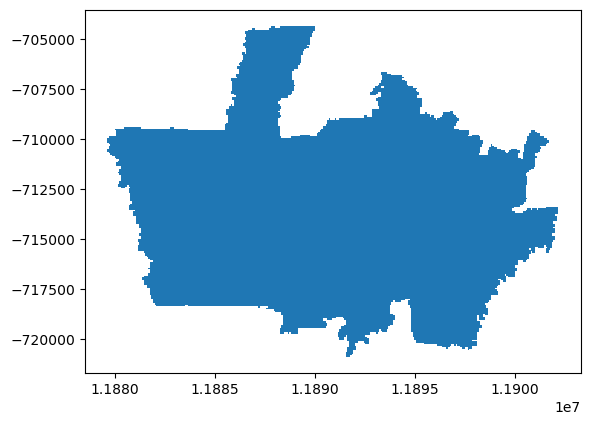

In [8]:
depok_school.plot()

<AxesSubplot: >

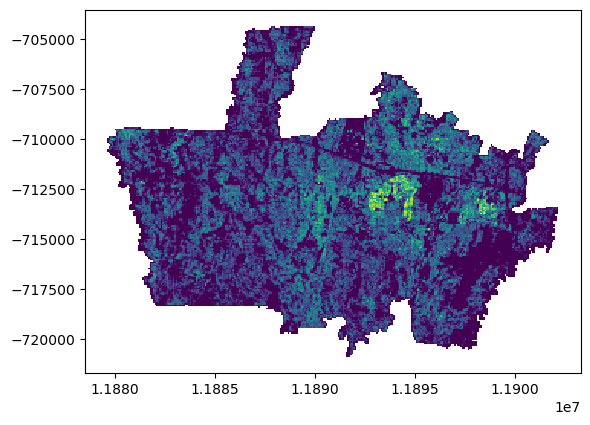

In [4]:
depok_school.plot(column="area")

Creating Probability Ballistic Impact Map 

In [4]:
from upt.aircraft.base_impact_model import BaseImpactModel

In [5]:
#Aircraft profile
drone_profile={
    'mass': 1,
    'g': 9.81,
    'cd': 0.02,
    'cl': 0,
    'flight_lv': 400
    }

sample_number = 10000

<AxesSubplot: >

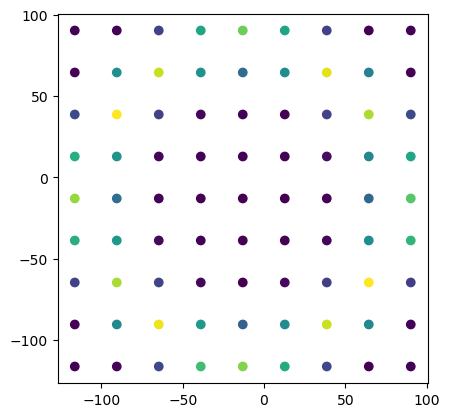

In [6]:
Ballistic_trajectory = BaseImpactModel("ballistic", drone_profile, depok_school.crs, sample_number)
ballistic_mask = Ballistic_trajectory.run_model()
ballistic_mask.plot(column="N_points")

In [58]:
ballistic_mask

,N_points,geometry
0,0.0000,POINT (-119.687 -119.687)
1,0.0000,POINT (-119.687 -93.383)
2,0.0039,POINT (-119.687 -67.079)
3,0.0196,POINT (-119.687 -40.774)
4,0.0203,POINT (-119.687 -14.470)
...,...,...
76,0.0314,POINT (90.747 -14.470)
77,0.0267,POINT (90.747 11.834)
78,0.0052,POINT (90.747 38.139)
79,0.0001,POINT (90.747 64.443)


In [ ]:
    def sjoin_risk_sum(array_index):
        mask_translate = mask.copy()
        mask_translate['geometry'] = mask.translate(gdf.iloc[array_index][0].centroid.x,gdf.iloc[array_index][0].centroid.y)
        sjoin_gp = gpd.sjoin(gdf, mask_translate)
        risk = sjoin_gp['N_points'].multiply(sjoin_gp['area']).sum()
        # risk = sjoin_gp[attr_columns].prod().sum()
        return(risk)

In [55]:
ballistic_mask_d_translate = ballistic_mask.copy()
ballistic_mask_d_translate['geometry'] = ballistic_mask.translate(depok_school.iloc[50][0].centroid.x,depok_school.iloc[50][0].centroid.y)

In [41]:
gpd.sjoin(depok_school_d, ballistic_mask_d_translate)

,geometry,quadkey,id,area,test2,index_right,N_points,test
24,"POLYGON ((11879842.936 -710635.052, 11879842.9...",3100121131102031011,24,2.906246,2,6,0.0050,1
24,"POLYGON ((11879842.936 -710635.052, 11879842.9...",3100121131102031011,24,2.906246,2,7,0.0000,1
24,"POLYGON ((11879842.936 -710635.052, 11879842.9...",3100121131102031011,24,2.906246,2,8,0.0000,1
25,"POLYGON ((11879842.936 -710711.489, 11879842.9...",3100121131102031013,25,277.120644,2,4,0.0250,1
25,"POLYGON ((11879842.936 -710711.489, 11879842.9...",3100121131102031013,25,277.120644,2,5,0.0198,1
...,...,...,...,...,...,...,...,...
65,"POLYGON ((11880072.247 -710787.926, 11880072.2...",3100121131102031130,65,0.000000,2,66,0.0264,1
65,"POLYGON ((11880072.247 -710787.926, 11880072.2...",3100121131102031130,65,0.000000,2,75,0.0175,1
66,"POLYGON ((11880072.247 -710864.363, 11880072.2...",3100121131102031132,66,0.000000,2,54,0.0039,1
66,"POLYGON ((11880072.247 -710864.363, 11880072.2...",3100121131102031132,66,0.000000,2,63,0.0000,1


In [37]:
depok_school_d = depok_school.copy()

In [38]:
depok_school_d['test2'] = 2

In [30]:
ballistic_mask_d = ballistic_mask.copy()

In [31]:
ballistic_mask_d['test'] = 1

Applying Probability falling drone map based on School area

In [7]:
from upt.riskcalculator.sjoin_mask import sjoin_mask
idx = np.arange(0, depok_school.shape[0])
risk = sjoin_mask(idx,ballistic_mask,depok_school,"N_points")

C:\Users\MICKO\anaconda3\envs\ox\lib\site-packages\geopandas\_vectorized.py:435: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  left = to_shapely(left)


KeyboardInterrupt: 

In [ ]:
depok_school['risk'] = risk['risk']

In [ ]:
depok_school.plot(column="risk", cmap="viridis")

why dont i just use gaussian function to do this

In [61]:
mask_polygon = ballistic_mask.iloc[0].geometry

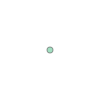

In [63]:
test = sjoin_mask